Importing all the external modules that will be used in training, testing, evaluating, visualising, and saving the model.

In [1]:
import pandas as pd
import pickle
import zipfile
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt

Reading the training dataset from the csv file and storing it in a dataframe.

In [2]:
dataset = pd.read_csv('players_21.csv')
dataset.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


Spliting the dataset into numerical features and categorical features based on the data type of the features.

In [3]:
dataset.info()

numerical_features = dataset.select_dtypes(include=['int64', 'float64'])
categorical_features = dataset.select_dtypes(include=['object'])

numerical_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,103500000.0,560000.0,33,170,72,241.0,1.0,...,96,32,35,24,6,11,15,14,8,NaN
1,20801,92,92,63000000.0,220000.0,35,187,83,45.0,1.0,...,95,28,32,24,7,11,15,14,11,NaN
2,188545,91,91,111000000.0,240000.0,31,184,80,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN
3,190871,91,91,132000000.0,270000.0,28,175,68,73.0,1.0,...,93,35,30,29,9,9,15,15,11,NaN
4,192985,91,91,129000000.0,370000.0,29,181,70,10.0,1.0,...,91,68,65,53,15,13,5,10,13,NaN


Dropping columns with more than 30% missing values for the numerical features.

In [4]:
numerical_features = numerical_features.dropna(thresh=0.7*len(numerical_features), axis=1)
numerical_features.head()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,93,93,103500000.0,560000.0,33,170,72,241.0,1.0,...,75,96,32,35,24,6,11,15,14,8
1,20801,92,92,63000000.0,220000.0,35,187,83,45.0,1.0,...,84,95,28,32,24,7,11,15,14,11
2,188545,91,91,111000000.0,240000.0,31,184,80,21.0,1.0,...,88,88,35,42,19,15,6,12,8,10
3,190871,91,91,132000000.0,270000.0,28,175,68,73.0,1.0,...,92,93,35,30,29,9,9,15,15,11
4,192985,91,91,129000000.0,370000.0,29,181,70,10.0,1.0,...,84,91,68,65,53,15,13,5,10,13


In [5]:
categorical_features.head()

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,FC Barcelona,Spain Primera Division,CAM,NaN,2004-07-01,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,Juventus,Italian Serie A,LS,NaN,2018-07-10,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,Paris Saint-Germain,French Ligue 1,LW,NaN,2017-08-03,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",1991-06-28,Manchester City,English Premier League,RCM,NaN,2015-08-30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


Dropping columns with more than 30% missing values for the categorical features.

In [6]:
categorical_features.info()


categorical_features = categorical_features.dropna(thresh=0.7*len(categorical_features), axis=1)
categorical_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18944 non-null  object
 1   short_name        18944 non-null  object
 2   long_name         18944 non-null  object
 3   player_positions  18944 non-null  object
 4   dob               18944 non-null  object
 5   club_name         18719 non-null  object
 6   league_name       18719 non-null  object
 7   club_position     18719 non-null  object
 8   club_loaned_from  758 non-null    object
 9   club_joined       17961 non-null  object
 10  nationality_name  18944 non-null  object
 11  nation_position   1127 non-null   object
 12  preferred_foot    18944 non-null  object
 13  work_rate         18944 non-null  object
 14  body_type         18944 non-null  object
 15  real_face         18944 non-null  object
 16  player_tags       1408 non-null   object
 17  player_trait

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_joined,nationality_name,...,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,FC Barcelona,Spain Primera Division,CAM,2004-07-01,Argentina,...,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,Juventus,Italian Serie A,LS,2018-07-10,Portugal,...,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/pt.png
2,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,2014-07-01,Poland,...,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,Paris Saint-Germain,French Ligue 1,LW,2017-08-03,Brazil,...,62+3,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",1991-06-28,Manchester City,English Premier League,RCM,2015-08-30,Belgium,...,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png


Converting the column `dob` to `cat_age` by subtracting the year of birth from the current year. The feature is called `cat_age` because the is an already existing feature called `age` in the numerical features. This is because age has more relational value than the year of birth.

Converting the column `club_joined` to `cat_years_in_club` by subtracting the year of joining the club from the current year.
This is because the number of years in the club has more relational value than the year of joining the club.

In [7]:
categorical_features['dob'] = pd.to_datetime(categorical_features['dob'])
categorical_features['club_joined'] = pd.to_datetime(categorical_features['club_joined'])

categorical_features['cat_age'] = categorical_features['dob'].apply(lambda x: 2023 - x.year)
categorical_features['cat_years_in_club'] = categorical_features['club_joined'].apply(lambda x: 2023 - x.year)

categorical_features = categorical_features.drop(['dob', 'club_joined'], axis=1)
categorical_features.head()

,player_url,short_name,long_name,player_positions,club_name,league_name,club_position,nationality_name,preferred_foot,work_rate,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_flag_url,cat_age,cat_years_in_club
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",FC Barcelona,Spain Primera Division,CAM,Argentina,Left,Medium/Low,...,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png,36,19.0
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",Juventus,Italian Serie A,LS,Portugal,Right,High/Low,...,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/pt.png,38,5.0
2,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,FC Bayern München,German 1. Bundesliga,ST,Poland,Right,High/Medium,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png,35,9.0
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",Paris Saint-Germain,French Ligue 1,LW,Brazil,Right,High/Medium,...,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png,31,6.0
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",Manchester City,English Premier League,RCM,Belgium,Right,High/High,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png,32,8.0


Dropping columns with more 90% unique values since unique categorical values do not provide any pattern or trends the model can learn from.

In [8]:
mostly_unique = [col for col in categorical_features.columns if categorical_features[col].nunique() >= 0.9 * len(categorical_features)]
categorical_features = categorical_features.drop(mostly_unique, axis=1)
categorical_features.head()

,player_positions,club_name,league_name,club_position,nationality_name,preferred_foot,work_rate,body_type,real_face,ls,...,lcb,cb,rcb,rb,gk,club_logo_url,club_flag_url,nation_flag_url,cat_age,cat_years_in_club
0,"RW, ST, CF",FC Barcelona,Spain Primera Division,CAM,Argentina,Left,Medium/Low,Unique,Yes,89+3,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png,36,19.0
1,"ST, LW",Juventus,Italian Serie A,LS,Portugal,Right,High/Low,Unique,Yes,91+1,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/pt.png,38,5.0
2,ST,FC Bayern München,German 1. Bundesliga,ST,Poland,Right,High/Medium,Unique,Yes,89+2,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png,35,9.0
3,"LW, CAM",Paris Saint-Germain,French Ligue 1,LW,Brazil,Right,High/Medium,Unique,Yes,84+3,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png,31,6.0
4,"CAM, CM",Manchester City,English Premier League,RCM,Belgium,Right,High/High,Unique,Yes,83+3,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png,32,8.0


Converting columns with categorical values like `89 + 3` to a numerical value like `92` this is done to increase the number of numerical features in the dataset.

In [9]:
# these columns start from column 9 to column 36

for col in categorical_features.columns[9:36]:
    categorical_features[col] = categorical_features[col].apply(lambda x: eval(x) if '+' in x or '-' in x else int(x))

categorical_features.head()

,player_positions,club_name,league_name,club_position,nationality_name,preferred_foot,work_rate,body_type,real_face,ls,...,lcb,cb,rcb,rb,gk,club_logo_url,club_flag_url,nation_flag_url,cat_age,cat_years_in_club
0,"RW, ST, CF",FC Barcelona,Spain Primera Division,CAM,Argentina,Left,Medium/Low,Unique,Yes,92,...,55,55,55,65,22,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png,36,19.0
1,"ST, LW",Juventus,Italian Serie A,LS,Portugal,Right,High/Low,Unique,Yes,92,...,57,57,57,64,23,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/pt.png,38,5.0
2,ST,FC Bayern München,German 1. Bundesliga,ST,Poland,Right,High/Medium,Unique,Yes,91,...,63,63,63,64,22,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png,35,9.0
3,"LW, CAM",Paris Saint-Germain,French Ligue 1,LW,Brazil,Right,High/Medium,Unique,Yes,87,...,52,52,52,65,23,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png,31,6.0
4,"CAM, CM",Manchester City,English Premier League,RCM,Belgium,Right,High/High,Unique,Yes,86,...,72,72,72,78,24,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png,32,8.0


Since we have the club_name and nationality of a player we can remove the the club_logo_url, club_flag_url and national_flag_url columns.

In [10]:
categorical_features = categorical_features.drop(['club_logo_url', 'club_flag_url', 'nation_flag_url'], axis=1)
categorical_features.head()

,player_positions,club_name,league_name,club_position,nationality_name,preferred_foot,work_rate,body_type,real_face,ls,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cat_age,cat_years_in_club
0,"RW, ST, CF",FC Barcelona,Spain Primera Division,CAM,Argentina,Left,Medium/Low,Unique,Yes,92,...,68,69,65,55,55,55,65,22,36,19.0
1,"ST, LW",Juventus,Italian Serie A,LS,Portugal,Right,High/Low,Unique,Yes,92,...,64,68,64,57,57,57,64,23,38,5.0
2,ST,FC Bayern München,German 1. Bundesliga,ST,Poland,Right,High/Medium,Unique,Yes,91,...,68,67,64,63,63,63,64,22,35,9.0
3,"LW, CAM",Paris Saint-Germain,French Ligue 1,LW,Brazil,Right,High/Medium,Unique,Yes,87,...,65,70,65,52,52,52,65,23,31,6.0
4,"CAM, CM",Manchester City,English Premier League,RCM,Belgium,Right,High/High,Unique,Yes,86,...,83,82,78,72,72,72,78,24,32,8.0


Convert the remaining categorical features to numerical by factorizing.

In [11]:
encodings_map  = {}

for col in categorical_features.select_dtypes(include=['object']).columns:
    encoded_values, unique_categories = pd.factorize(categorical_features[col])
    encodings_map[col] = dict(zip(unique_categories, encoded_values))
    categorical_features[col] = encoded_values

categorical_features.head()

,player_positions,club_name,league_name,club_position,nationality_name,preferred_foot,work_rate,body_type,real_face,ls,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cat_age,cat_years_in_club
0,0,0,0,0,0,0,0,0,0,92,...,68,69,65,55,55,55,65,22,36,19.0
1,1,1,1,1,1,1,1,0,0,92,...,64,68,64,57,57,57,64,23,38,5.0
2,2,2,2,2,2,1,2,0,0,91,...,68,67,64,63,63,63,64,22,35,9.0
3,3,3,3,3,3,1,2,0,0,87,...,65,70,65,52,52,52,65,23,31,6.0
4,4,4,4,4,4,1,3,0,0,86,...,83,82,78,72,72,72,78,24,32,8.0


Combine the numerical and categorical features to form one dataframe that will be used for training the model.

In [12]:
dataset = pd.concat([numerical_features, categorical_features], axis=1)
dataset.head()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cat_age,cat_years_in_club
0,158023,93,93,103500000.0,560000.0,33,170,72,241.0,1.0,...,68,69,65,55,55,55,65,22,36,19.0
1,20801,92,92,63000000.0,220000.0,35,187,83,45.0,1.0,...,64,68,64,57,57,57,64,23,38,5.0
2,188545,91,91,111000000.0,240000.0,31,184,80,21.0,1.0,...,68,67,64,63,63,63,64,22,35,9.0
3,190871,91,91,132000000.0,270000.0,28,175,68,73.0,1.0,...,65,70,65,52,52,52,65,23,31,6.0
4,192985,91,91,129000000.0,370000.0,29,181,70,10.0,1.0,...,83,82,78,72,72,72,78,24,32,8.0


Drop the `age` feature in the dataset since we have the `cat_age` which is their accurate age as of now. (2023 - dob)

In [13]:
dataset = dataset.drop('age', axis=1)

Measure feature importance using the Random Forest Regressor.

In [14]:
X = dataset.drop(['overall'], axis=1)
y = dataset['overall']

Imputing the missing values in the dataset by filling them with the mean of the column.

In [15]:
X_imputed = X.fillna(X.mean())
y_imputed = y

X_imputed.shape, y_imputed.shape

((18944, 93), (18944,))

Training the random forest regressor with a 100 estimators.

In [16]:
imputedRegressor = RandomForestRegressor(n_estimators=100, random_state=42)
imputedRegressor.fit(X_imputed, y_imputed)

RandomForestRegressor(random_state=42)

Showing the feature importance of the model in a dataframe format.

In [17]:
imputed_feature_importances = pd.DataFrame(imputedRegressor.feature_importances_, index=X_imputed.columns, columns=['importance']).sort_values('importance', ascending=False)
imputed_feature_importances *= 100
imputed_feature_importances.head()

,importance
value_eur,67.874505
release_clause_eur,14.479838
cat_age,10.897917
potential,4.851055
movement_reactions,1.044440


Keeping only the important features for our X (Independent Variables).

In [18]:
y = y_imputed

X = imputed_feature_importances[imputed_feature_importances['importance'] > 1].index
X = X_imputed[X]
X.head()

,value_eur,release_clause_eur,cat_age,potential,movement_reactions
0,103500000.0,138400000.0,36,93,94
1,63000000.0,75900000.0,38,92,95
2,111000000.0,132000000.0,35,91,93
3,132000000.0,166500000.0,31,91,91
4,129000000.0,161000000.0,32,91,91


Checking to see how the data is distributed using X.describe().

In [19]:
X.describe()

,value_eur,release_clause_eur,cat_age,potential,movement_reactions
count,1.894400e+04,1.894400e+04,18944.000000,18944.000000,18944.000000
mean,2.902288e+06,4.296353e+06,28.644848,71.086729,61.609428
std,7.695181e+06,9.791922e+06,4.707360,6.109985,9.112954
min,9.000000e+03,9.000000e+03,20.000000,47.000000,24.000000
25%,4.750000e+05,5.440000e+05,25.000000,67.000000,56.000000
50%,9.750000e+05,1.200000e+06,28.000000,71.000000,62.000000
75%,2.100000e+06,4.296353e+06,32.000000,75.000000,68.000000
max,1.855000e+08,2.031000e+08,56.000000,95.000000,95.000000


Scaling the data using the StandardScaler, this is done to make sure that all the features are on the same scale and to avoid some features dominating the others. The StandardScaler object is saved for later use.

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X.describe()


,value_eur,release_clause_eur,cat_age,potential,movement_reactions
count,1.894400e+04,1.894400e+04,1.894400e+04,1.894400e+04,1.894400e+04
mean,2.400482e-17,-2.400482e-17,2.400482e-16,-4.440892e-16,1.200241e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-3.759970e-01,-4.378575e-01,-1.836502e+00,-3.942295e+00,-4.127138e+00
25%,-3.154380e-01,-3.832192e-01,-7.743074e-01,-6.688784e-01,-6.155606e-01
50%,-2.504606e-01,-3.162234e-01,-1.369908e-01,-1.419506e-02,4.286014e-02
75%,-1.042613e-01,-9.511383e-17,7.127647e-01,6.404883e-01,7.012809e-01
max,2.372947e+01,2.030336e+01,5.811298e+00,3.913905e+00,3.664174e+00


Splitting the data for training and testing using the train_test_split function from sklearn. We want to choose the model to use, so we will use the train data to train the model and the test data to test the model on different models and choose the one that performs best.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15155, 5), (15155,), (3789, 5), (3789,))

Training the models with 16 different regression models and comparing their performance

In [22]:
regression_models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'BayesianRidge': BayesianRidge(),
    'HuberRegressor': HuberRegressor(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'MLPRegressor': MLPRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'XGBRegressor': XGBRegressor()
}

mse = {}
mae = {}
r2 = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse[name] = mean_squared_error(y_test, y_pred)
    mae[name] = mean_absolute_error(y_test, y_pred)
    r2[name] = r2_score(y_test, y_pred)

/home/daniel/Sem_2_2/AI/assign2/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Converting perfomance data into a dataframe and sorting the data using the R2 score metric.

In [23]:
accuracy = pd.DataFrame([mse, mae, r2], index=['MSE', 'MAE', 'R2']).T
accuracy = accuracy.sort_values('R2', ascending=False)
accuracy

,MSE,MAE,R2
RandomForestRegressor,0.239501,0.258212,0.994919
ExtraTreesRegressor,0.261853,0.279439,0.994445
XGBRegressor,0.291889,0.362709,0.993807
DecisionTreeRegressor,0.442854,0.263966,0.990605
GradientBoostingRegressor,0.674244,0.588017,0.985695
MLPRegressor,0.904483,0.613745,0.980811
SVR,1.515019,0.706362,0.967858
KNeighborsRegressor,1.645141,0.809501,0.965097
AdaBoostRegressor,3.357335,1.505739,0.928772
SGDRegressor,5.117582,1.750477,0.891427


Plot the accuracy of the models

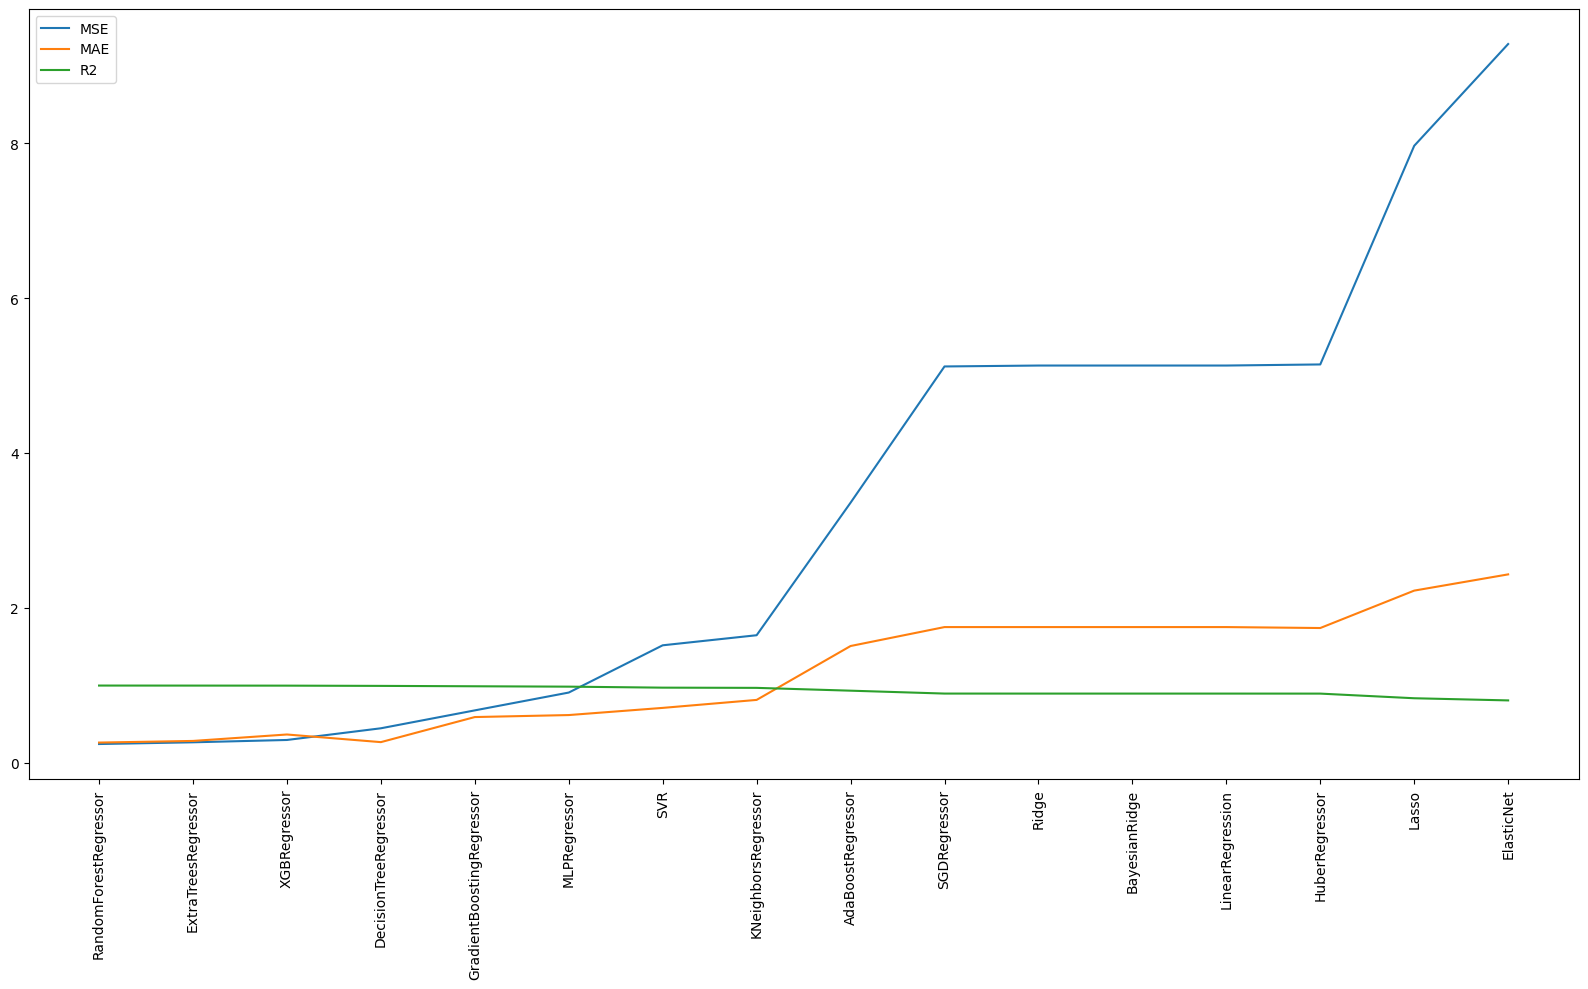

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(accuracy['MSE'], label='MSE')
plt.plot(accuracy['MAE'], label='MAE')
plt.plot(accuracy['R2'], label='R2')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Random forest has the lowest mean absolute error and the highest r2 score so we wil go with the Random Forest Regressor algotithm.

We now have to tune the hyperparameters of the model to get the best performance, and train it on the entire training dataset.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

# Combine x_train and x_test into one data frame since its all part of the training set, applying the same to y

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

grid_search.fit(X, y)

grid_search.best_params_

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


Training the model using the best parameters and the entire training dataset.

In [ ]:
model_with_best_params = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500, n_jobs=-1, random_state=42)
model_with_best_params.fit(X, y)

Reading the test dataset from a csv file and storing it in a dataframe.

In [ ]:
test_data = pd.read_csv('players_22.csv')
test_data.head()

Calculating the current age of the players in the test dataset. This corresponds to the `cat_age` feature in the training dataset.

In [ ]:
test_data['cat_age'] = 2023 - pd.to_datetime(test_data.dob).dt.year
test_data.cat_age.head()

Creating a subset of the data that contains only the columns that were used to train the model.

In [ ]:
needed_columns = ['value_eur','release_clause_eur','cat_age','potential','movement_reactions']
test_features = test_data[needed_columns]
test_features.head()

In [ ]:
test_features.info()

In [ ]:
test_overall = test_data.overall
test_overall.head()

Imputing the missing values in the dataset by filling them with the mean of the column.

In [ ]:
test_features = test_features.fillna(test_features.mean())

In [ ]:
test_features.head()

Scaling the data using the StandardScaler object that was saved earlier.

In [ ]:
with open('scaler_model.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)  # Load the saved scaler
test_features = loaded_scaler.transform(test_features)

Predicting the overall rating of the players in the test dataset.

In [ ]:
y_pred = model_with_best_params.predict(test_features)

Printing the metrics of the model.

In [ ]:
mae = mean_absolute_error(test_overall, y_pred)
r2 = r2_score(test_overall, y_pred)
mse = mean_squared_error(test_overall, y_pred)

print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'MSE: {mse}')

Plotting the actual and predicted values to see the correlation

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_overall, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Player')
plt.ylabel('Overall')
plt.legend()
plt.show()

In [ ]:
comparison = pd.DataFrame({'Actual': test_overall, 'Predicted': y_pred})
comparison.tail(10)

The model has an r2 score of 0.97 which is very good, and the mean absolute error is 0.5 which is also very good.

Saving the model for deployment in the web app using pickle.

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model_with_best_params, f)

The raw model is very large (more than 300mb in size) so we will compress it using gzip to make it smaller (less than 100mb) in size. This will allow us to upload it to github.

In [ ]:
zip_filename = "model.zip"
model_filename = "model.pkl"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as archive:
    archive.write(model_filename)

print(f"{model_filename} has been zipped to {zip_filename}")

Deleting the raw model to save space.

In [ ]:
file_path = 'model.pkl'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been removed")